In [1]:
#import pandas and seaborn

In [3]:
import pandas as pd

In [5]:
import seaborn as sns

In [8]:
# Try different encodings
encodings = ['utf-8', 'latin1', 'iso-8859-1']

In [9]:
# Attempt to read the CSV file with different encodings
for encoding in encodings:
    try:
        df = pd.read_csv("graduation_rate.csv", encoding=encoding)
        print("CSV file successfully loaded with encoding:", encoding)
        break
    except UnicodeDecodeError:
        print("Error decoding with encoding:", encoding)

Error decoding with encoding: utf-8
CSV file successfully loaded with encoding: latin1


In [10]:
df

,ACT composite score,SAT total score,parental level of education,parental income,high school gpa,college gpa,years to graduate
0,22,1625,high school,"£40,999.00",3.0,3.1,7
1,29,2090,associate's degree,"£75,817.00",4.0,3.4,5
2,30,2188,bachelor's degree,"£82,888.00",4.0,3.9,3
3,33,2151,associate's degree,"£93,518.00",4.0,3.7,5
4,29,2050,associate's degree,"£79,153.00",4.0,3.4,6
...,...,...,...,...,...,...,...
995,32,2234,some college,"£30,658.00",4.0,3.0,10
996,27,1930,some college,"£59,443.00",3.6,3.2,4
997,32,2117,associate's degree,"£94,415.00",4.0,3.8,4
998,32,2034,some high school,"£31,713.00",3.9,3.2,8


In [12]:
df.dtypes

ACT composite score              int64
SAT total score                  int64
parental level of education     object
parental income                 object
high school gpa                float64
college gpa                    float64
years to graduate                int64
dtype: object

In [ ]:
#We are going to clean up the data and filter for the useful one

In [ ]:
# I am going to change the column names

In [20]:
df = df.rename(columns = { 'ACT composite score': 'ACT', 'SAT total score': 'SAT', 'parental level of education': 'parents_education',
                          'parental income': 'parent_income', 'high school gpa': 'HS_gpa', 'college gpa': 'C_gpa', 'years to graduate': 'graduate-years'})

In [22]:
df.head(25)

,ACT,SAT,parents_education,parent_income,HS_gpa,C_gpa,graduate-years
0,22,1625,high school,"£40,999.00",3.0,3.1,7
1,29,2090,associate's degree,"£75,817.00",4.0,3.4,5
2,30,2188,bachelor's degree,"£82,888.00",4.0,3.9,3
3,33,2151,associate's degree,"£93,518.00",4.0,3.7,5
4,29,2050,associate's degree,"£79,153.00",4.0,3.4,6
5,28,1976,master's degree,"£100,048.00",3.8,3.5,4
6,29,2097,some college,"£46,883.00",4.0,3.4,6
7,30,1976,some college,"£67,379.00",3.7,3.4,5
8,27,2072,bachelor's degree,"£102,424.00",3.9,3.9,4
9,32,2246,bachelor's degree,"£56,793.00",4.0,3.6,3


In [32]:
#filter C_gpa to 3.0 - 4.0 
df2 = df[df['C_gpa'] > 2.9]

In [34]:
df2

,ACT,SAT,parents_education,parent_income,HS_gpa,C_gpa,graduate-years
0,22,1625,high school,"£40,999.00",3.0,3.1,7
1,29,2090,associate's degree,"£75,817.00",4.0,3.4,5
2,30,2188,bachelor's degree,"£82,888.00",4.0,3.9,3
3,33,2151,associate's degree,"£93,518.00",4.0,3.7,5
4,29,2050,associate's degree,"£79,153.00",4.0,3.4,6
...,...,...,...,...,...,...,...
995,32,2234,some college,"£30,658.00",4.0,3.0,10
996,27,1930,some college,"£59,443.00",3.6,3.2,4
997,32,2117,associate's degree,"£94,415.00",4.0,3.8,4
998,32,2034,some high school,"£31,713.00",3.9,3.2,8


In [39]:
#filtering HS_GPa from 3.5 to 4
df2 = df[(df['C_gpa'] > 2.9) & (df['HS_gpa'] > 3.4)]

In [38]:
df2

,ACT,SAT,parents_education,parent_income,HS_gpa,C_gpa,graduate-years
1,29,2090,associate's degree,"£75,817.00",4.0,3.4,5
2,30,2188,bachelor's degree,"£82,888.00",4.0,3.9,3
3,33,2151,associate's degree,"£93,518.00",4.0,3.7,5
4,29,2050,associate's degree,"£79,153.00",4.0,3.4,6
5,28,1976,master's degree,"£100,048.00",3.8,3.5,4
...,...,...,...,...,...,...,...
995,32,2234,some college,"£30,658.00",4.0,3.0,10
996,27,1930,some college,"£59,443.00",3.6,3.2,4
997,32,2117,associate's degree,"£94,415.00",4.0,3.8,4
998,32,2034,some high school,"£31,713.00",3.9,3.2,8


In [40]:
#charts and graphs

<Axes: xlabel='ACT', ylabel='Count'>

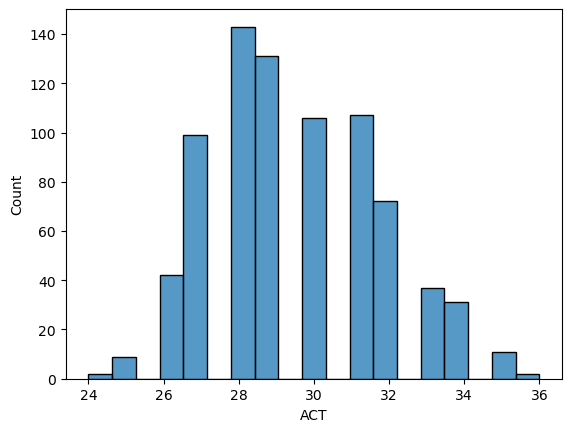

In [43]:
sns.histplot(df2['ACT'])

<Axes: xlabel='C_gpa', ylabel='HS_gpa'>

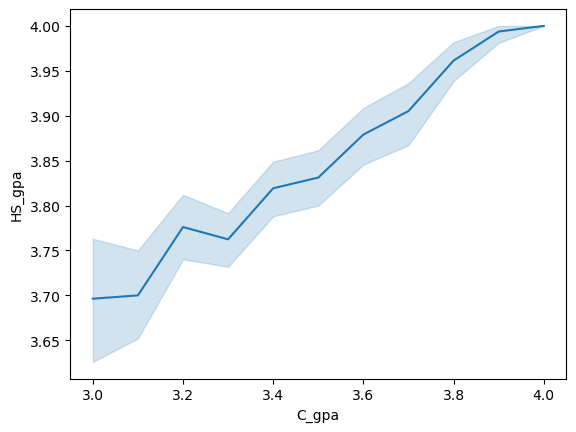

In [47]:
sns.lineplot(data=df2, x='C_gpa', y='HS_gpa')

In [48]:
#does the number of years affect the in college affect the gpa

<Axes: xlabel='graduate-years', ylabel='C_gpa'>

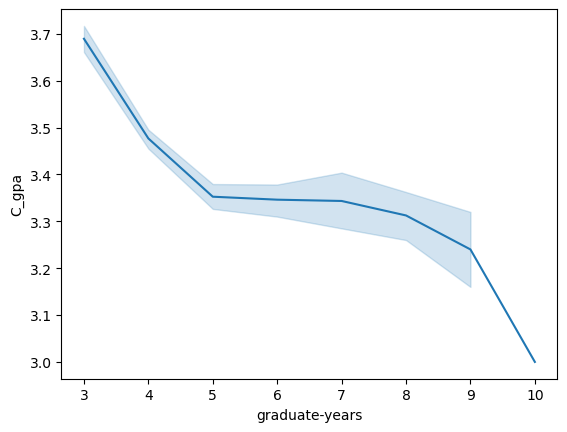

In [53]:
sns.lineplot(data=df2, x='graduate-years', y='C_gpa')  

In [58]:
#predicting SAT or ATC scores from ACT or SAT scores respectively

<Axes: xlabel='ACT', ylabel='SAT'>

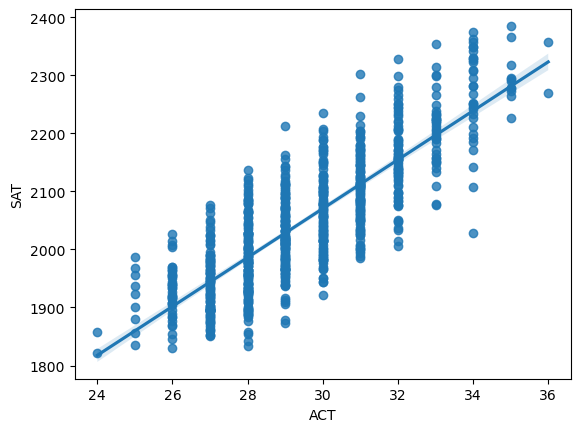

In [57]:
sns.regplot(data = df2, x = 'ACT', y = 'SAT')